<a href="https://colab.research.google.com/github/mystic23/Alg_Havel_Hakimi/blob/main/Algm_Havel_Hakimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Havel-Hakimi - Grafos
### (1) Teorema
### (2) Algoritmo


#Teorema

  Una secuencia S: d<sub>1</sub>,d<sub>2</sub>, ... , d<sub>n</sub> de números enteros no negativos, con d<sub>1</sub> ≥ d<sub>2</sub> ≥ ... ≥ d<sub>n</sub>, es una secuencia gráfica si, y sólo si, la secuencia  d<sub>2</sub>-1, d<sub>3</sub>-1 , ... , d<sub>*d1+1*</sub> -1,d<sub>*d1+2*</sub> , ..., d<sub>*n*</sub>

  [Teorema enlace - Trello](https://trello.com/c/zUDu1mH8/47-teorema-havel-hakimi)


- Ejemplo:
  S: 6, 5, 4, 3, 3, 3, 2, 0
  1. Eliminar el primer elemento **6** reducirá los 6 elementos después del primer elemento en -1 y se obtiene, además, se reorganiza de Mayor a menor si esta desorganizado: 
    
    **S: 4, 3, 2, 2, 2, 1, 0**
  
  2. Eliminar **4**, se reduce en 4 elementos después del primero en -1, se obtiene:

    **S: 2, 1, 1, 1, 1, 0**
  
  3. Eliminar **2**, se reduce en 2 elementos después del primero en -1, se obtiene:

    **S: 0, 0, 1, 1, 0**

    Organizado:

    **S: 1, 1, 0, 0, 0**

  4. Eliminar **1**, se reduce en  1 elementos después del primero en -1, se obtiene:

    **S: 0, 0, 0, 0**

  
  

# Algoritmo

the length of the degree sequence is 8
Intermediate Sequence [6, 5, 4, 3, 3, 3, 2, 0]
Popped: 6
Intermediate Sequence [4, 3, 2, 2, 2, 1, 0]
Popped: 4
Intermediate Sequence [2, 1, 1, 1, 1, 0]
Popped: 2
Intermediate Sequence [1, 1, 0, 0, 0]
Popped: 1
Intermediate Sequence [0, 0, 0, 0]
There exists a graph G with this degree sequence
Intermediate Sequence [6, 5, 4, 3, 3, 3, 2, 0]
Popped: 6
Intermediate Sequence [4, 3, 2, 2, 2, 1, 0]
Popped: 4
Intermediate Sequence [2, 1, 1, 1, 1, 0]
Popped: 2
Intermediate Sequence [1, 1, 0, 0, 0]
Popped: 1
Intermediate Sequence [0, 0, 0, 0]
There exists a graph G with this degree sequence


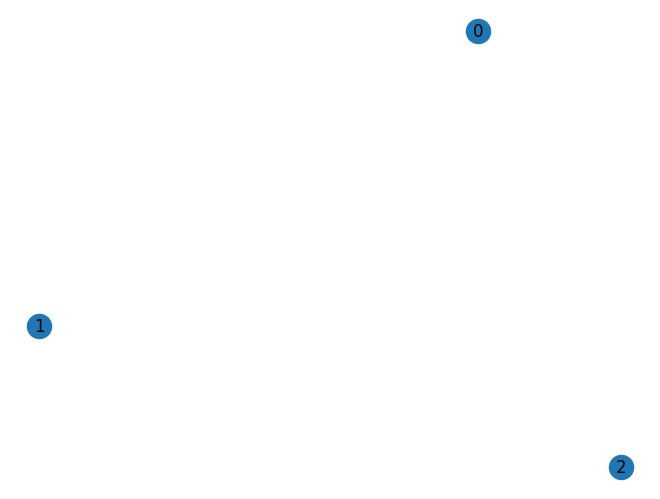

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import time

def havelHakimi(sequence):

    if all(isinstance(degrees, int) for degrees in sequence):
       degree_sequence = list(sequence)

    else:
        return False
    if len(degree_sequence) == 0:
        print("la lista esta vacía")
        return True

    if sum(degree_sequence) % 2:
        print("No existe un grafo con esta secuencia de grados, además, la suma de todos los elementos de la secuencia de grados no es par.")
        return False
    if min(degree_sequence) < 0:
        print("No existe ningún grafo con esa secuencia de grados. ¡La secuencia de grados no debe tener números negativos!")
        return False  # negative degree

    while degree_sequence:
        degree_sequence.sort()
        degree_sequence.reverse()
        print("Intermediate Sequence " + str(degree_sequence))
        for item in degree_sequence:
            if item < 0:
                print("No graph exists with this degree sequence.")
                return (False, degree_sequence)
        d = degree_sequence.pop(0)
        if d == 0:
            print("There exists a graph G with this degree sequence")
            return (True, degree_sequence)
        if d > len(degree_sequence):
            print(str(d) + " dgree is too large for sequence!")
            return (False, degree_sequence)
        for i in range(0, d):
            degree_sequence[i] -= 1
        print("Popped: " + str(d))
    return (False, degree_sequence)




sequence=[6, 5, 4, 3, 3, 3, 2, 0]
n=8
print("the length of the degree sequence is {0}".format(n))

x = havelHakimi(sequence)[0]
grados_resultante = havelHakimi(sequence)[1]

if x==True:
    G = nx.configuration_model(grados_resultante)

    # Visualizar el grafo
    nx.draw(G, with_labels=True)
    plt.show()